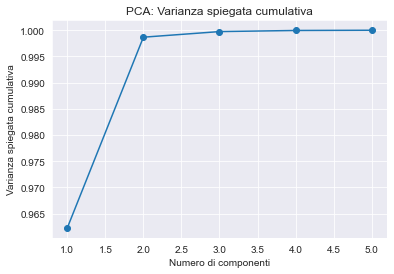

Numero di componenti per spiegare il 90% della varianza: 1
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        14
         1.0       1.00      0.87      0.93        15

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29



In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv('../newData/transformed_data.csv')

df = df[df['year'] < 11]

# Definisci le colonne target e predittive (key_cols dovrebbe contenere le colonne rilevanti per il modello)
key_cols = ["confID", "year", "TPI_Sum", "winrate", "roundsPlayed"]
target = "playoff"

# X e y per l'addestramento
X = df[key_cols]
y = df[target]

# Determina il numero minimo di componenti per spiegare il 90% della varianza
pca_temp = PCA().fit(X)
explained_variance = pca_temp.explained_variance_ratio_.cumsum()
n_components = next(i for i, total_var in enumerate(explained_variance) if total_var >= 0.90) + 1

# Visualizza la varianza spiegata cumulativa
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('PCA: Varianza spiegata cumulativa')
plt.show()

print(f"Numero di componenti per spiegare il 90% della varianza: {n_components}")

# Suddividi i dati in train e validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Riduci le dimensioni con PCA usando il numero ottimale di componenti
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Inizializza e addestra il modello di regressione logistica
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train)

# Predici sul set di validazione
y_val_pred = model.predict(X_val_pca)

# Calcola e stampa l'accuratezza
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualizza il report di classificazione
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


In [9]:
import pandas as pd

df = pd.read_csv('../newData/transformed_data.csv')

# Carica il dataset e filtra per l'anno 11
df_year_11 = df[df['year'] == 11].copy()

# Riempie eventuali NaN direttamente nel DataFrame
X_year_11 = df_year_11[key_cols].fillna(df[key_cols].mean())

# Riduci le dimensioni con PCA
X_year_11_pca = pca.transform(X_year_11)

# Prevedi il valore di 'playoff' per le squadre nell'anno 11
df_year_11['playoff_pred'] = model.predict(X_year_11_pca)

# Dividi le squadre per conference e seleziona quelle previste per i playoff
east_teams = df_year_11[(df_year_11['confID'] == 0) & (df_year_11['playoff_pred'] == 1)]
west_teams = df_year_11[(df_year_11['confID'] == 1) & (df_year_11['playoff_pred'] == 1)]

# Assicura che ci siano esattamente 4 squadre per ogni conference selezionando le prime 4
east_qualifiers = east_teams.nlargest(4, 'TPI_Sum')
west_qualifiers = west_teams.nlargest(4, 'TPI_Sum')

# Combina le squadre qualificate e aggiungi quelle non qualificate con playoff_pred=0
qualified_teams = pd.concat([east_qualifiers, west_qualifiers])
df_year_11['playoff_pred'] = df_year_11.apply(
    lambda row: 1 if row['tmID'] in qualified_teams['tmID'].values else 0, axis=1
)

# Salva il dataset con tutte le squadre e le previsioni playoff
df_year_11[['tmID', 'confID', 'playoff_pred']].to_csv('../newData/playoff_predictions.csv', index=False)

# Visualizza un'anteprima del file creato
print(df_year_11[['tmID', 'confID', 'playoff_pred']].head(10))


    tmID  confID  playoff_pred
142  CHA       0             1
143  CLE       0             1
144  CON       0             1
145  DET       0             1
146  HOU       1             1
147  IND       0             0
148  LAS       1             1
149  MIA       0             0
150  MIN       1             1
151  NYL       0             0


In [ ]:
# TODO list per la avalicao
# commentare correttamente tutto il codice
# provare a considerare in maniera diversa i premi di ogni player all'interno del team - per influenzare eventuali future vittorie
# provare più metodi di classification !!!
# aggiustare win rate
# iniziare bozza presentazione
# scegliere main topics presentazione
# mettere nella presentazione la cosa delle scommesse
# tante belle cose